# Lending Club Machine Learning: Data Visualization

### Can we build a machine learning model that can accurately predict if a borrower will pay off their loan on time or not?

Lending Club, a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. Each borrower fills out a comprehensive application, providing their past financial history, the reason for the loan, and more. Lending Club evaluates each borrower’s credit score using past historical data and their own data science process and then assigns an interest rate to the borrower.

Approved loans are listed on the Lending Club website, where qualified investors can browse recently approved loans, the borrower’s credit score, the purpose for the loan, and other information from the application.

Once an investor decides to fund a loan, the borrower then makes monthly payments back to Lending Club. Lending Club redistributes these payments to investors.

# The Problem:
Many loans aren’t completely paid off on time and some borrowers default on the loan.

I have been tasked with building a model to predict whether borrowers are likely to pay or default on their loans.

# The Data:

On LendingClub’s site, you can select different year ranges to download data sets (in CSV format) 
for both approved and declined loans.

You’ll also find a data dictionary (in XLS format) towards the bottom of the LendingClub page, which contains information on the different column names. This data dictionary is useful for understanding what each column represents in the data set. 

The data dictionary contains two sheets:

1. LoanStats sheet: describes the approved loans dataset
2. RejectStats sheet: describes the rejected loans dataset


For this project I’ll be using the(LoanStats sheet) working with approved loans data for the years 2007 to 2011.

The approved loans data set contains information on current loans, completed loans, and defaulted loans. 


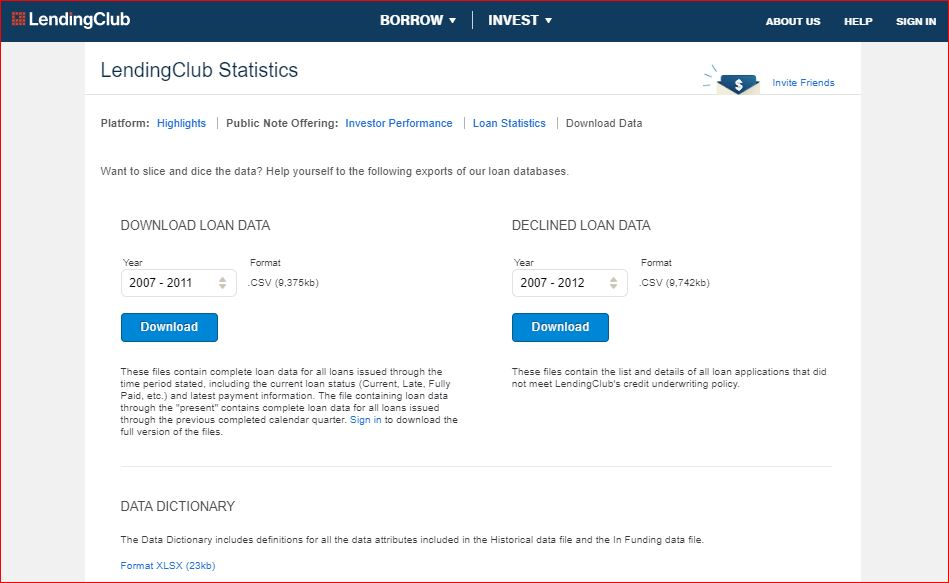

# Loading The Data Into Pandas

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
plt.rcParams['figure.figsize'] = (12,8)

# Tasks for Cleaning Data

1. Remove the first line: it contains extraneous text instead of the column titles. This text prevents the data set from being parsed properly by the pandas library.
2. Removing all columns with more than 50% missing values

In [2]:
#skip row 1 so pandas can parse the data properly.
loans_20072011 = pd.read_csv('data/lending_club_loans.csv', skiprows=1, low_memory=False)
half_count = len(loans_20072011) / 2
loans_20072011 = loans_20072011.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
loans_20072011 = loans_20072011.drop(['desc'],axis=1) # These columns are not useful for our purposes

In [3]:
loans_20072011.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-2015,171.62,May-2019,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,Apr-2013,119.66,Oct-2016,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.0,0.00,Jun-2014,649.91,Jun-2017,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N


In [4]:
loans_20072011.shape

(42538, 52)

In [5]:
#search for duplicate rows
loans_20072011.duplicated().value_counts()

False    42536
True         2
dtype: int64

In [6]:
loans_20072011 = loans_20072011.drop_duplicates()
print(loans_20072011.iloc[0])
print(loans_20072011.shape[1])

loan_amnt                            5000
funded_amnt                          5000
funded_amnt_inv                      4975
term                            36 months
int_rate                           10.65%
installment                        162.87
grade                                   B
sub_grade                              B2
emp_title                             NaN
emp_length                      10+ years
home_ownership                       RENT
annual_inc                          24000
verification_status              Verified
issue_d                          Dec-2011
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
zip_code                            860xx
addr_state                             AZ
dti                                 27.65
delinq_2yrs                             0
earliest_cr_line                 Jan-1985
inq_last_6mths                    

In [7]:
#verify for duplicate rows removed
loans_20072011.duplicated().value_counts()

False    42536
dtype: int64

# Data Visualizations

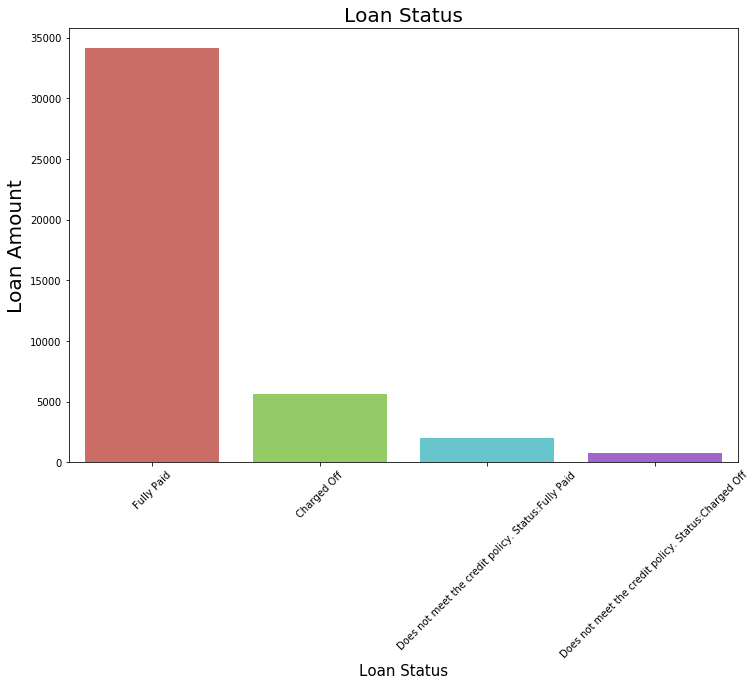

In [8]:
# Loan Status
plt.figure(figsize = (12,8))
g = sns.countplot(x="loan_status",data=loans_20072011,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=20)

plt.savefig("images/loanstatus.png")

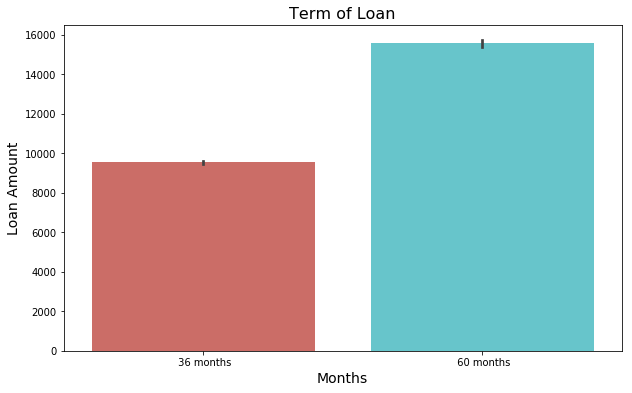

In [9]:
# Bar plot of Term (Loan taken for number of months)
plt.figure(figsize=(10,6))
sns.barplot("term", "loan_amnt", data=loans_20072011, palette='hls')
plt.title("Term of Loan", fontsize=16)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)

plt.savefig("images/termofloan.png")

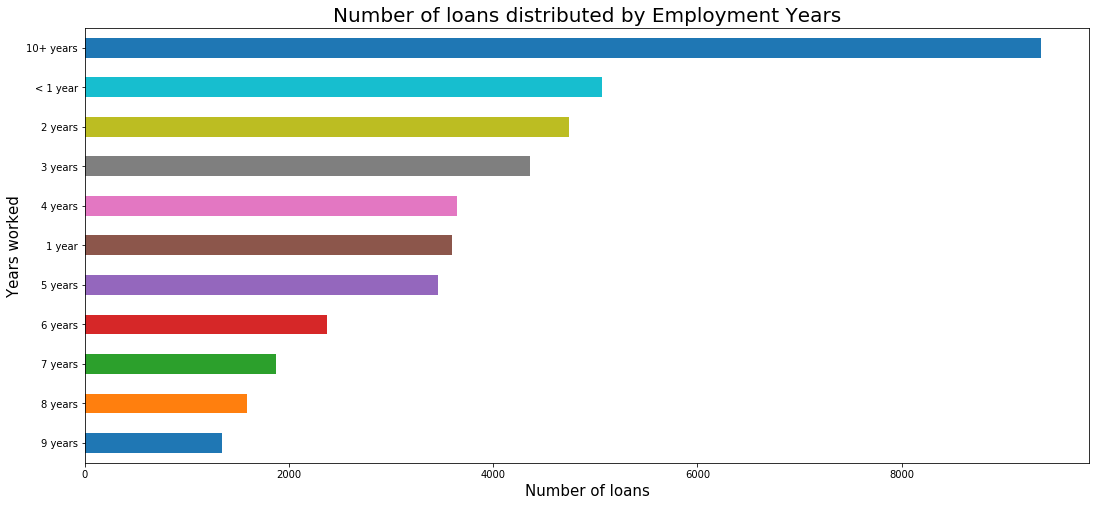

In [10]:
# Employment Length and Number of Loans
loans_20072011['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);
plt.savefig("images/employmentlengthandnumberofloans.png")

In [11]:
df = pd.read_csv('data/lending_club_loans.csv', skiprows=1, low_memory=False)

In [12]:
# Create a target variable "Loan Status" with two categories Good and Bad Loan
df["Loan_Class"] = np.where((df.loan_status == 'Current') |
                        (df.loan_status == 'Fully Paid') |
                        (df.loan_status== "Issued") |
                        (df.loan_status == 'Does not meet the credit policy. Status:Fully Paid'), 1, 0)

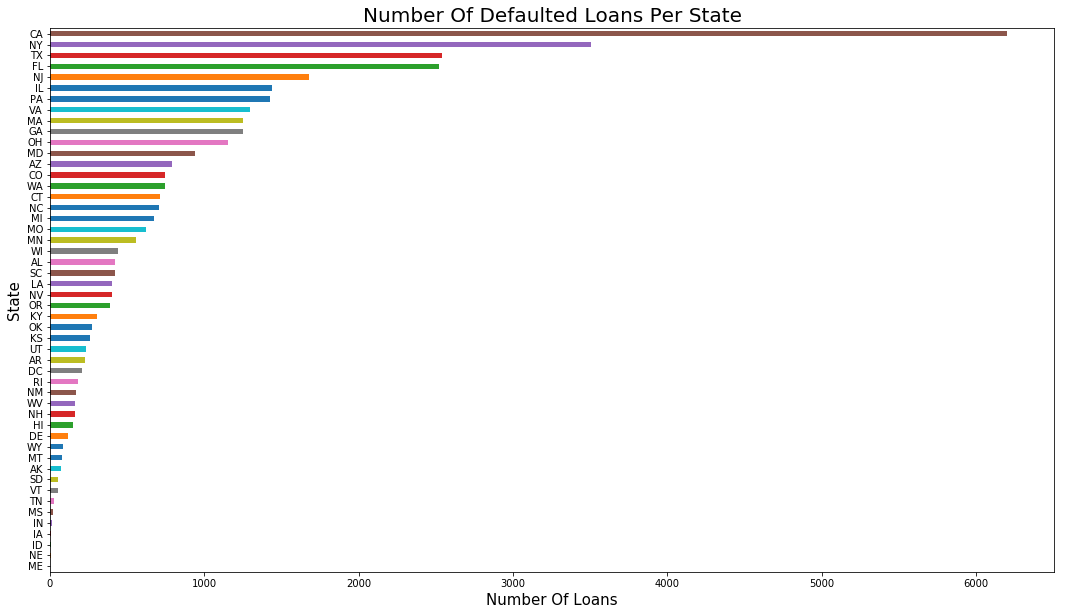

In [13]:
# No of Defaulted Loans per State
fig = plt.figure(figsize=(18,10))
df[df['Loan_Class']==1].groupby('addr_state')['Loan_Class'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number Of Loans',fontsize=15)
plt.title('Number Of Defaulted Loans Per State',fontsize=20);

plt.savefig("images/numberofdefaultedloansperstate.png")

Loan Amount Distribution BoxPlot


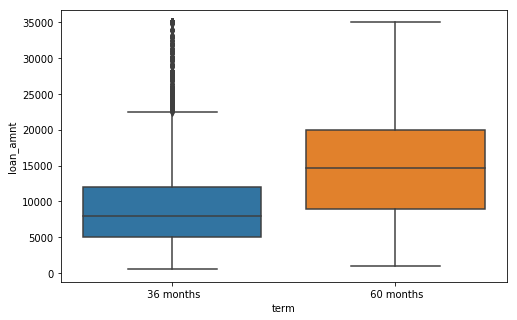

In [14]:
# Boxplot of Term and Loan Amount
print("Loan Amount Distribution BoxPlot")
plt.figure(figsize=(8,5))
sns.boxplot(x=loans_20072011.term, y=loans_20072011.loan_amnt)
plt.savefig("images/boxtermandloanamount.png")

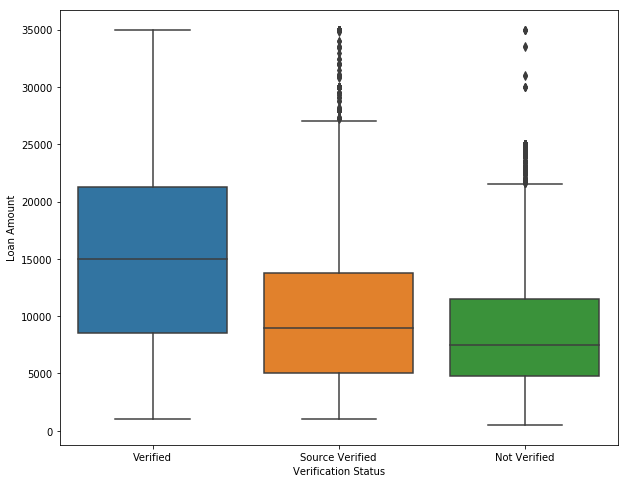

In [15]:
# Boxplot of Verification Status and Loan Amount
plt.figure(figsize=(10,8))
sns.boxplot(x=loans_20072011.verification_status, y=loans_20072011.loan_amnt)
plt.xlabel("Verification Status")
plt.ylabel("Loan Amount")
plt.savefig("images/boxverifystatusandloanamount.png")

In [16]:
# Crosstabulation of Purpose and Loan Status
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(loans_20072011[purp_loan[0]], loans_20072011[purp_loan[1]]).style.background_gradient(cmap = cm)
#plt.savefig("images/crosstabulation.png")

loan_status,Charged Off,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid
purpose,,,,
car,160,13,51,1391
credit_card,548,69,271,4589
debt_consolidation,2792,292,808,15884
educational,56,32,65,269
home_improvement,351,71,143,2634
house,59,11,33,323
major_purchase,222,23,100,1966
medical,106,22,36,589
moving,92,15,31,491
